Import relevant packages here.

In [4]:
import matplotlib.pyplot as plt
import pandas as pd


Load the data and verify it is loaded correctly.
<ul>
    <li>Print it (head, tail, or specific rows, choose a sensible number of rows).</li>
    <li>Compare it to the source file.</li>
<ul>

In [11]:
data = pd.read_csv(r'C:\Users\omniq\Desktop\2025 period 1\TIL6022\TIL6022 TIL Python Programming (202425 Q1) - 942024 - 1116 AM\Assignment 5\cf_data.csv')
print(data.head())
print(data.tail())

         dv        s         a
0 -0.743240  53.5427  1.242570
1 -0.557230  53.6120  1.777920
2 -0.454769  53.6541  0.544107
3 -0.525396  53.7030 -0.294755
4 -0.601285  53.7592 -0.290961
            dv        s         a
73903  5.19874  116.139 -0.795081
73904  5.10428  115.627 -0.314263
73905  5.13764  115.118  0.232283
73906  5.15348  114.599  0.262078
73907  5.25868  113.112 -0.612440


In the ensuing, you will use <code>numpy</code>.

Let's create a grid for the values to plot. But first create <b>two arrays named <code>dv</code> and <code>s</code></b> using <code>numpy.linspace</code> that hold the grid values at the relevant indices in their respective dimension of the grid.

Create a <b>grid named <code>a</code></b> with zeros using <code>numpy.zeros</code> in to which calculated acceleration values can be stored.<br>
<br>
Let the grid span:<br>
<ul>
    <li>Speed difference <code>dv</code> [m/s]
        <ul>
            <li>From -10 till 10</li>
            <li>With 41 evenly spaced values</li>
        </ul>
    </li>
    <li>Headway <code>s</code> [m]
        <ul>
            <li>From 0 till 200</li>
            <li>With 21 evenly spaced values</li>
        </ul>
    </li>
</ul>

In [6]:
import numpy as np

dv = np.linspace(-10, 10, 41)  # Speed difference: from -10 to 10 with 41 evenly spaced values
s = np.linspace(0, 200, 21)    # Headway: from 0 to 200 with 21 evenly spaced values

# Create the grid a to store calculated acceleration values
a = np.zeros((len(s), len(dv)))  # Grid of zeros with dimensions [21, 41] corresponding to s and dv

# To verify
print("dv array:", dv)
print("s array:", s)
print("Grid shape:", a.shape)


dv array: [-10.   -9.5  -9.   -8.5  -8.   -7.5  -7.   -6.5  -6.   -5.5  -5.   -4.5
  -4.   -3.5  -3.   -2.5  -2.   -1.5  -1.   -0.5   0.    0.5   1.    1.5
   2.    2.5   3.    3.5   4.    4.5   5.    5.5   6.    6.5   7.    7.5
   8.    8.5   9.    9.5  10. ]
s array: [  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170. 180. 190. 200.]
Grid shape: (21, 41)


Create from the imported data 3 separate <code>numpy</code> arrays for each column <code>dv</code>, <code>s</code> and <code>a</code>. (We do this for speed reasons later.)
<ul>
    <li>Make sure to name them differently from the arrays that belong to the grid as above.</li>
    <li>You can access the data of each column in a <code>DataFrame</code> using <code>data.xxx</code> where <code>xxx</code> is the column name (not as a string).</li>
    <li>Use the method <code>to_numpy()</code> to convert a column to a <code>numpy</code> array.</li>
</ul>

In [7]:
DV = data.dv.to_numpy()
S = data.s.to_numpy()
A = data.a.to_numpy() 


Create an algorithm that calculates all the acceleration values and stores them in the grid. The algorithm is described visually in the last part of the lecture. At each grid point, it calculates a weighted mean of all measurements. The weights are given by an exponential function, based on the 'distance' between the grid point, and the measurement values of <code>dv</code> and <code>s</code>. To get you started, how many <code>for</code>-loops do you need?<br>
<br>
For this you will need <code>math</code>.<br>
Use an <i>upsilon</i> of 1.5m/s and a <i>sigma</i> of 30m.<br>
<br>
<b>Warning:</b> This calculation may take some time. So:
<ul>
    <li>Print a line for each iteration of the outer-most <code>for</code>-loop that shows you the progress.</li>
    <li>Test you code by running it only on the first 50 measurements of the data.</li>
</ul>

In [9]:
import math

upsilon = 1.5  # m/s
sigma = 30     # m

# Assuming we have 50 rows from the data for testing purposes
DV = data.dv.to_numpy()[:50]  # Convert 'dv' column to numpy array (first 50 measurements)
S = data.s.to_numpy()[:50]    # Convert 's' column to numpy array (first 50 measurements)
A = data.a.to_numpy()[:50] 

for i, s_grid_value in enumerate(s):  # Loop over headway 's' values
    print(f"Calculating for headway s[{i}]: {s_grid_value} m")
    for j, dv_grid_value in enumerate(dv):  # Loop over speed difference 'dv' values
        
        # Initialize weight and weighted acceleration sum
        weighted_sum = 0
        weight_total = 0
        
        # For each measurement, calculate its contribution to this grid point
        for k in range(len(DV)):
            # Calculate the 'distance' between grid points and measurement points
            delta_dv = dv_grid_value - DV[k]
            delta_s = s_grid_value - S[k]
            
            # Calculate the weights using the exponential function
            weight_dv = math.exp(-(delta_dv ** 2) / (2 * upsilon ** 2))
            weight_s = math.exp(-(delta_s ** 2) / (2 * sigma ** 2))
            
            # Combine the weights (product of weight_dv and weight_s)
            weight = weight_dv * weight_s
            
            # Calculate weighted acceleration and accumulate
            weighted_sum += weight * A[k]
            weight_total += weight
        
        # Store the weighted mean acceleration value in the grid
        if weight_total > 0:
            a[i, j] = weighted_sum / weight_total  # Store the result in grid 'a'
        else:
            a[i, j] = 0  # Handle case where weights sum to zero (e.g., no close measurements)

Calculating for headway s[0]: 0.0 m
Calculating for headway s[1]: 10.0 m
Calculating for headway s[2]: 20.0 m
Calculating for headway s[3]: 30.0 m
Calculating for headway s[4]: 40.0 m
Calculating for headway s[5]: 50.0 m
Calculating for headway s[6]: 60.0 m
Calculating for headway s[7]: 70.0 m
Calculating for headway s[8]: 80.0 m
Calculating for headway s[9]: 90.0 m
Calculating for headway s[10]: 100.0 m
Calculating for headway s[11]: 110.0 m
Calculating for headway s[12]: 120.0 m
Calculating for headway s[13]: 130.0 m
Calculating for headway s[14]: 140.0 m
Calculating for headway s[15]: 150.0 m
Calculating for headway s[16]: 160.0 m
Calculating for headway s[17]: 170.0 m
Calculating for headway s[18]: 180.0 m
Calculating for headway s[19]: 190.0 m
Calculating for headway s[20]: 200.0 m


The following code will plot the data for you. Does it make sense when considering:
<ul>
    <li>Negative (slower than leader) and positive (faster than leader) speed differences?</li>
    <li>Small and large headways?</li>
</ul>

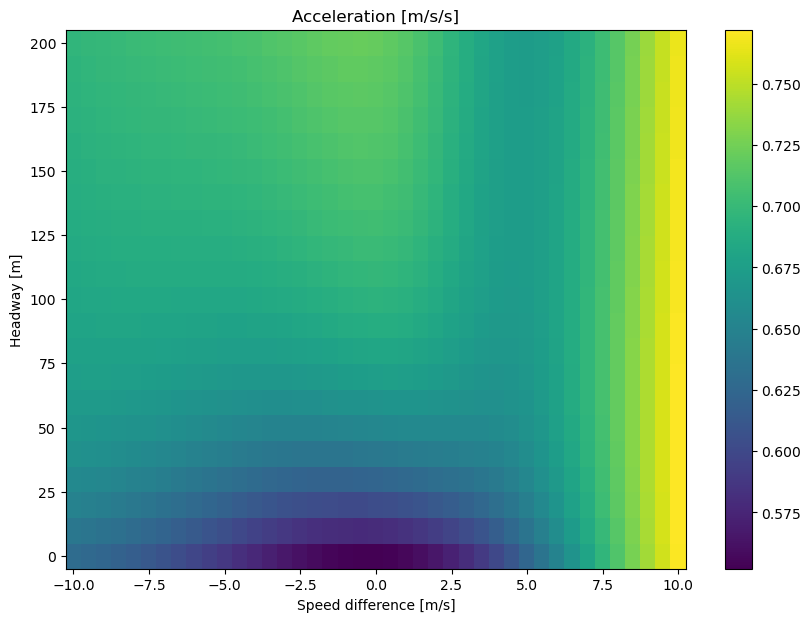

In [10]:
X, Y = np.meshgrid(dv, s)
axs = plt.axes()
p = axs.pcolor(X, Y, a, shading='nearest')
axs.set_title('Acceleration [m/s/s]')
axs.set_xlabel('Speed difference [m/s]')
axs.set_ylabel('Headway [m]')
axs.figure.colorbar(p);
axs.figure.set_size_inches(10, 7)